<a href="https://colab.research.google.com/github/MatiasHolmemoMardal/FastMONAI/blob/main/Spleen_semantic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binary semantic segmentation spleen

In [ ]:
%pip install fastmonai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.8/172.8 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 65.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 108.3 MB/s eta 0:00:00
     ━━━━━━━━

In [ ]:
from fastMONAI.vision_all import *

from monai.apps import DecathlonDataset
from sklearn.model_selection import train_test_split

### Download external data


We use the MONAI function `DecathlonDataset` to download the data and generate items for training. 

set path

In [ ]:
path = Path('../data')
path.mkdir(exist_ok=True)


Download the heart dataset

In [ ]:
training_data = DecathlonDataset(root_dir=path, task="Task09_Spleen", section="training", 
    download=True, cache_num=0, num_workers=3)

Task09_Spleen.tar: 1.50GB [01:31, 17.6MB/s]                            

2023-04-20 12:07:07,979 - INFO - Downloaded: ../data/Task09_Spleen.tar


2023-04-20 12:07:11,049 - INFO - Verified 'Task09_Spleen.tar', md5: 410d4a301da4e5b2f6f86ec3ddba524e.
2023-04-20 12:07:11,050 - INFO - Writing into directory: ../data.


Put dataset into a dataframe and print the shape

In [ ]:
df = pd.DataFrame(training_data.data)
df.shape

(33, 2)

Split the labled data into training and test

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.1, random_state=42)
train_df.shape, test_df.shape

((29, 2), (4, 2))

### Examine the training data

Each class label will be counted for the masks (including the background) if you pass in the mask path and define the `dtype` to be `MedMask` in `MedDataset`

Create a MedDataset instance and preprocess the data, also summarizing the dataset information.

In [ ]:
med_dataset = MedDataset(img_list=train_df.label.tolist(), dtype=MedMask, max_workers=12)

In [ ]:
med_dataset.df.head()

,path,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,voxel_count_0,voxel_count_1
0,../data/Task09_Spleen/labelsTr/spleen_44.nii.gz,512,512,92,0.8711,0.8711,5.0,RAS+,24085911,31337
1,../data/Task09_Spleen/labelsTr/spleen_14.nii.gz,512,512,54,0.8516,0.8516,5.0,RAS+,14031613,124163
2,../data/Task09_Spleen/labelsTr/spleen_8.nii.gz,512,512,31,0.7852,0.7852,7.5,RAS+,8017987,108477
3,../data/Task09_Spleen/labelsTr/spleen_16.nii.gz,512,512,61,0.7930,0.7930,8.0,RAS+,15950740,40044
4,../data/Task09_Spleen/labelsTr/spleen_9.nii.gz,512,512,41,0.7441,0.7441,5.0,RAS+,10650694,97210


In [ ]:
data_info_df = med_dataset.summary()

In [ ]:
data_info_df.head()

,dim_0,dim_1,dim_2,voxel_0,voxel_1,voxel_2,orientation,example_path,total
0,512,512,31,0.7852,0.7852,7.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_8.nii.gz,1
15,512,512,89,0.7266,0.7266,2.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_21.nii.gz,1
27,512,512,156,0.8359,0.8359,3.0,RAS+,../data/Task09_Spleen/labelsTr/spleen_53.nii.gz,1
26,512,512,148,0.9688,0.9688,1.5,RAS+,../data/Task09_Spleen/labelsTr/spleen_22.nii.gz,1
25,512,512,119,0.7695,0.7695,4.0,RAS+,../data/Task09_Spleen/labelsTr/spleen_27.nii.gz,1


In [ ]:
resample, reorder = med_dataset.suggestion()
resample, reorder

([0.7852, 0.7852, 5.0], False)

In [ ]:
bs=4

In [ ]:
img_size = med_dataset.get_largest_img_size(resample=resample)
img_size

[637.0, 637.0, 103.0]

Define data augmentation and preprocessing transformations.

In [ ]:
size = [160,160,128]

In [ ]:
item_tfms = [ZNormalization(), PadOrCrop(size), RandomAffine(scales=0, degrees=5)]  # RandomMotion()

Create a MedDataBlock instance and dataloaders for the training and validation sets.

In [ ]:
dblock = MedDataBlock(blocks=(ImageBlock(cls=MedImage), MedMaskBlock), 
                      splitter=RandomSplitter(valid_pct=0.1, seed=42), # By passing valid_pct=0.1, we tell it to get a random 10% of the training set for validation.
                      get_x=ColReader('image'),
                      get_y=ColReader('label'),
                      item_tfms=item_tfms,
                      reorder=reorder,
                      resample=resample) 

In [ ]:
dls = dblock.dataloaders(train_df, bs=bs)

In [ ]:
# training and validation
len(dls.train_ds.items), len(dls.valid_ds.items)

(27, 2)

Visualize a batch of data.

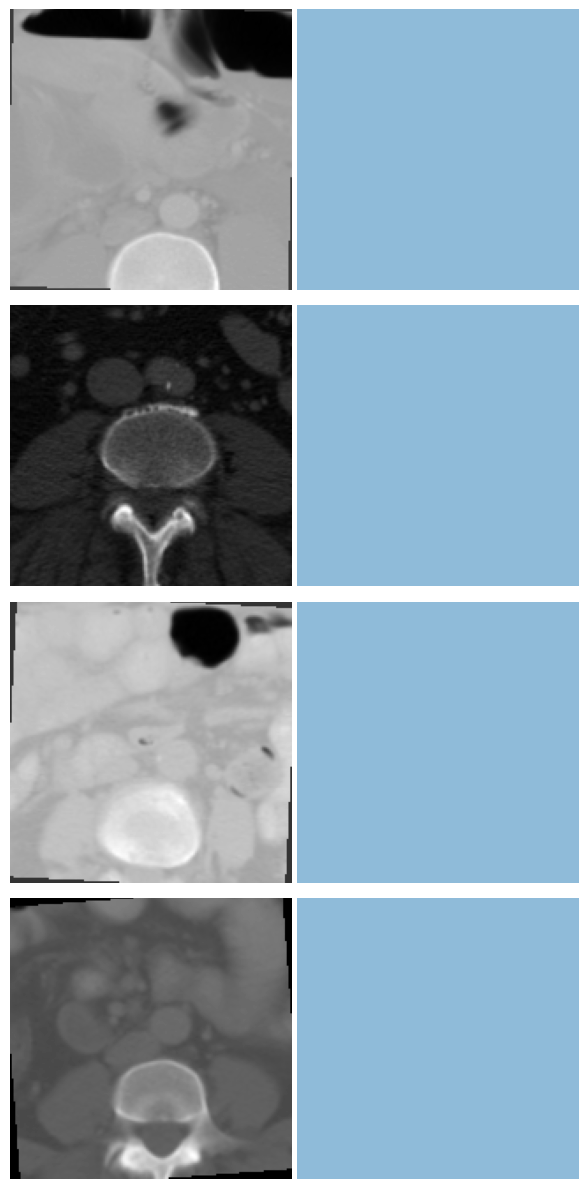

In [ ]:
dls.show_batch(anatomical_plane=2) 

### Create and train a 3D model

Define a 3D U-Net model with specific architecture parameters.

In [ ]:
from monai.networks.nets import UNet
from monai.losses import DiceLoss

In [ ]:
model = UNet(spatial_dims=3, in_channels=1, out_channels=1, channels=(16, 32, 64, 128, 256),strides=(2, 2, 2, 2), num_res_units=2)
model = model.model

Define the DiceLoss as the loss function for training.

In [ ]:
loss_func = CustomLoss(loss_func=DiceLoss(sigmoid=True))

Create a Learner object with the model, loss function, and optimizer (Ranger).

In [ ]:
learn = Learner(dls, model, loss_func=loss_func, opt_func=ranger, metrics=binary_dice_score)

Perform learning rate finding to determine the optimal learning rate for training.

SuggestedLRs(valley=0.04786301031708717)

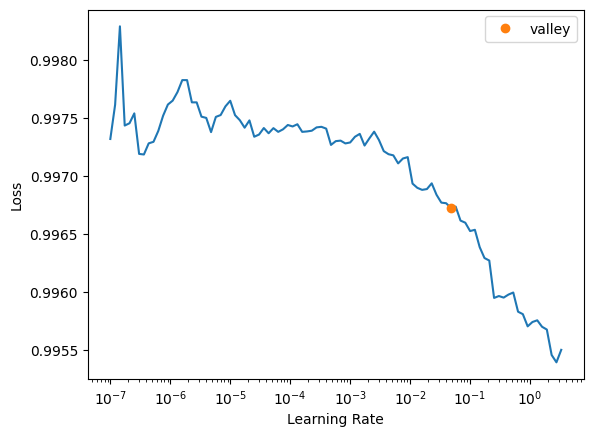

In [ ]:
learn.lr_find()

Apply the learning rate to the learning pipeline

In [ ]:
lr = 0.047863

In [ ]:
callbacks = EarlyStoppingCallback(monitor='valid_loss', patience=3)

Train the model with fit_flat_cos() with 30 epochs

In [ ]:
learn.fit_flat_cos(30, lr)


epoch,train_loss,valid_loss,binary_dice_score,time
0,0.997781,0.994329,nan,00:31
1,0.996820,0.992097,nan,00:34
2,0.995889,0.991143,nan,00:36
3,0.995588,0.990566,nan,00:31
4,0.995562,0.989924,nan,00:34
5,0.995141,0.988780,nan,00:30
6,0.994519,0.986954,nan,00:32
7,0.993917,0.984277,nan,00:32
8,0.993287,0.980706,nan,00:34
9,0.992140,0.975463,nan,00:32


visual representation of the training progress of the deep learning model, plotting the loss over time

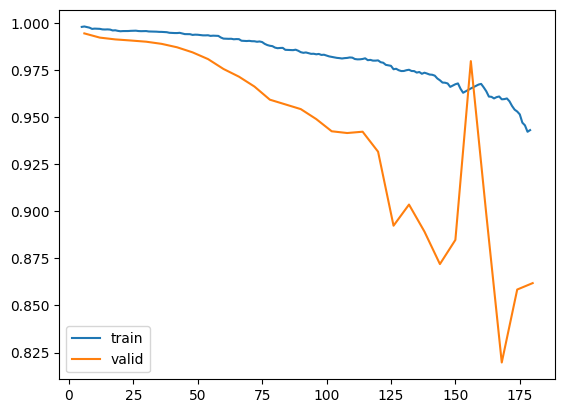

In [ ]:
learn.recorder.plot_loss()

Save the model

In [ ]:
learn.save('spleen-model')

Path('models/spleen-model.pth')

Show results with target and prediction

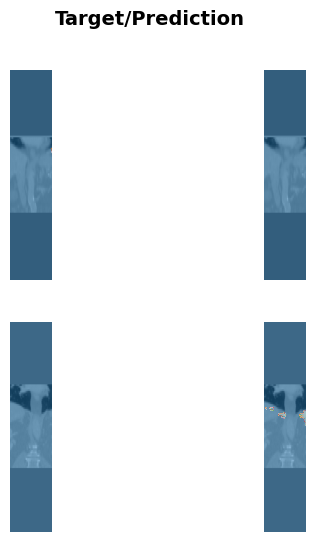

In [ ]:
learn.show_results(anatomical_plane=1)

Export the model

In [ ]:
if 'google.colab' in str(get_ipython()):
  temp_path = Path('/content/drive/MyDrive/DAT255/FastMONAI/models')
else:
  temp_path = Path(os.getcwd())
learn.path = temp_path

In [ ]:
learn.export('fastmonai_model_heart.pkl')

In [ ]:
learn.load('fastmonai_model_heart')

FileNotFoundError: ignored

In [ ]:
learn.load('heart-model');

NameError: ignored

### Test the model

In [ ]:
test_dl = learn.dls.test_dl(test_df,with_labels=True)

Show batch with picture and mask

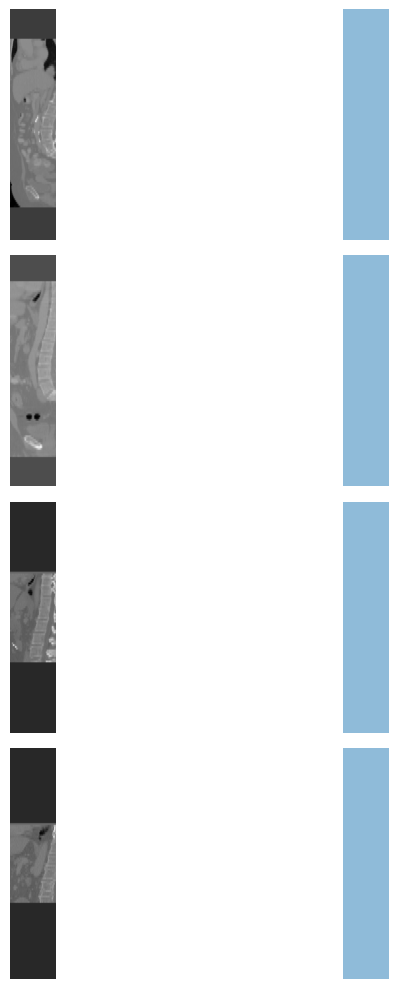

In [ ]:
test_dl.show_batch(anatomical_plane=0, figsize=(10,10))

In [ ]:
pred_acts, labels = learn.get_preds(dl=test_dl)
pred_acts.shape, labels.shape

(torch.Size([4, 1, 160, 160, 128]), torch.Size([4, 1, 160, 160, 128]))

Get the dice score

In [ ]:
binary_dice_score(pred_acts, labels)

tensor(nan)

Show batch with target and prediction

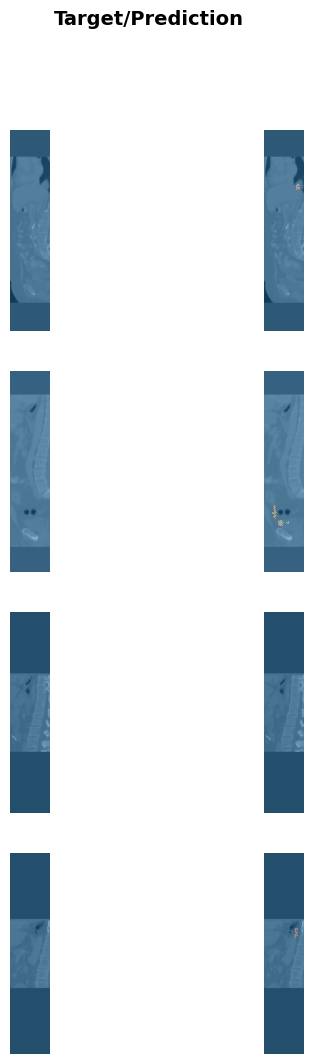

In [ ]:
learn.show_results(anatomical_plane=0, dl=test_dl)